# Introduction to Pandas

Pandas is a powerful and flexible open-source data analysis and manipulation library for Python. It provides data structures and functions needed to efficiently manipulate large datasets and perform complex data analyses. Whether you're working with time series data, financial data, or other forms of tabular data, Pandas offers a robust set of tools to make your data analysis tasks easier and more intuitive.

## Key Features of Pandas

- **Data Structures**: Pandas introduces two primary data structures:
  - **Series**: A one-dimensional array-like structure that can hold any data type (integers, strings, floats, etc.) with an associated index.
  - **DataFrame**: A two-dimensional, size-mutable, tabular data structure with labeled axes (rows and columns), which can be thought of as a table or a spreadsheet.

- **Data Alignment and Integration**: Pandas makes it easy to align data from different sources and integrate them into a single DataFrame, handling missing data and aligning data automatically.

- **Data Cleaning and Transformation**: Pandas offers powerful methods for cleaning and transforming data, including handling missing values, filtering data, and reshaping datasets.

- **Data Aggregation and Grouping**: With Pandas, you can group data and perform aggregations to summarize and analyze data across different categories or groups.

- **Time Series Analysis**: Pandas has robust support for time series data, including functionality for resampling, time shifting, and handling date and time operations.

- **Data Visualization**: Pandas integrates with Matplotlib to provide simple plotting capabilities for visualizing data directly from DataFrames and Series.

## Why Use Pandas?

Pandas simplifies many aspects of data analysis with its intuitive and easy-to-use API. It allows you to:
- Perform complex data manipulations and analyses with just a few lines of code.
- Handle large datasets efficiently.
- Easily clean and preprocess data to prepare it for further analysis or machine learning.

Whether you're a data scientist, analyst, or engineer, Pandas is an essential tool for working with data in Python. In this notebook, we'll explore the core functionalities of Pandas, including how to create and manipulate Series and DataFrames, handle missing data, and perform advanced data operations.


In [2]:
!pip -q install pandas


In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd


**Series**

In [4]:
# Creating a Series from a list
kids = ['Parsa', 'Nikoo', 'Alij']
kids_series = pd.Series(kids)
print(kids_series)

# Creating a Series from a dictionary
jobs = {'Parsa': 'Gamer', 'Nikoo': 'Scientist', 'Alij': 'Student'}
jobs_series = pd.Series(jobs)
print(jobs_series)


0    Parsa
1    Nikoo
2     Alij
dtype: object
Parsa        Gamer
Nikoo    Scientist
Alij       Student
dtype: object


**Handling Missing Data**

In [8]:
# Series with NaN values
numbers = [1, 2, 3, None]
numbers_series = pd.Series(numbers)
print(numbers_series)

# Check for NaN
print(np.isnan(np.nan))  # True

# Handle missing values
filled_series = numbers_series.fillna(0)
print(filled_series)


0    1.0
1    2.0
2    3.0
3    NaN
dtype: float64
True
0    1.0
1    2.0
2    3.0
3    0.0
dtype: float64


**Indexing and Accessing Data**

In [10]:
# Accessing by label and position
print(jobs_series.loc['Parsa'])   # 'Gamer'
print(jobs_series.iloc[0])        # 'Gamer'

# Iterating through a Series
for label, value in jobs_series.items():
    print(f"{label}: {value}")

Gamer
Gamer
Parsa: Gamer
Nikoo: Scientist
Alij: Student


**DataFrames**
**Creating DataFrames**

In [11]:
# Creating a DataFrame from a dictionary of Series
data = {
    'Name': ['Alice', 'Jack', 'Helen'],
    'Class': ['Physics', 'Chemistry', 'Biology'],
    'Score': [85, 82, 90]
}
df = pd.DataFrame(data, index=['school1', 'school2', 'school1'])
print(df)


          Name      Class  Score
school1  Alice    Physics     85
school2   Jack  Chemistry     82
school1  Helen    Biology     90


**Accessing and Modifying Data**

In [16]:
# Accessing rows and columns
print(df.loc['school2'])
print(df['Name'])
print(df.loc['school1', 'Score'])

# Adding and removing columns
df['ClassRanking'] = [2, 4, 3]
print(df)

df.drop('Class', axis=1, inplace=True)
print(df)

Name          Jack
Class    Chemistry
Score           82
Name: school2, dtype: object
school1    Alice
school2     Jack
school1    Helen
Name: Name, dtype: object
school1    85
school1    90
Name: Score, dtype: int64
          Name      Class  Score  ClassRanking
school1  Alice    Physics     85             2
school2   Jack  Chemistry     82             4
school1  Helen    Biology     90             3
          Name  Score  ClassRanking
school1  Alice     85             2
school2   Jack     82             4
school1  Helen     90             3


**Querying Data**

In [17]:
# Filtering rows based on conditions
high_scores = df[df['Score'] > 85]
print(high_scores)

# Using multiple conditions
filtered_df = df[(df['Score'] > 84) & (df['ClassRanking'] > 2)]
print(filtered_df)


          Name  Score  ClassRanking
school1  Helen     90             3
          Name  Score  ClassRanking
school1  Helen     90             3


**Handling Missing Data**

In [18]:
# Adding a column with missing values
df['Age'] = [14, 16, None]
print(df)

# Drop rows with missing values
df_dropped = df.dropna()
print(df_dropped)

# Fill missing values
df_filled = df.fillna({'Age': 0})
print(df_filled)

          Name  Score  ClassRanking   Age
school1  Alice     85             2  14.0
school2   Jack     82             4  16.0
school1  Helen     90             3   NaN
          Name  Score  ClassRanking   Age
school1  Alice     85             2  14.0
school2   Jack     82             4  16.0
          Name  Score  ClassRanking   Age
school1  Alice     85             2  14.0
school2   Jack     82             4  16.0
school1  Helen     90             3   0.0


Merging and Joining DataFrames

In [19]:
# Creating additional DataFrames
df1 = pd.DataFrame({'Name': ['Alice', 'Bob'], 'Age': [25, 30]})
df2 = pd.DataFrame({'Name': ['Alice', 'Bob'], 'Score': [85, 90]})

# Merging DataFrames
merged_df = pd.merge(df1, df2, on='Name', how='inner')
print(merged_df)


    Name  Age  Score
0  Alice   25     85
1    Bob   30     90


**Time Series Handling**

In [20]:
# Creating a time series DataFrame
dates = pd.date_range('20230101', periods=6)
ts_df = pd.DataFrame({'Date': dates, 'Value': np.random.randn(6)})
ts_df.set_index('Date', inplace=True)
print(ts_df)

# Extracting date parts
ts_df['Year'] = ts_df.index.year
ts_df['Month'] = ts_df.index.month
print(ts_df)


               Value
Date                
2023-01-01  1.034953
2023-01-02 -0.444170
2023-01-03  0.891771
2023-01-04 -1.649392
2023-01-05 -0.381064
2023-01-06  0.601412
               Value  Year  Month
Date                             
2023-01-01  1.034953  2023      1
2023-01-02 -0.444170  2023      1
2023-01-03  0.891771  2023      1
2023-01-04 -1.649392  2023      1
2023-01-05 -0.381064  2023      1
2023-01-06  0.601412  2023      1


**Plotting**

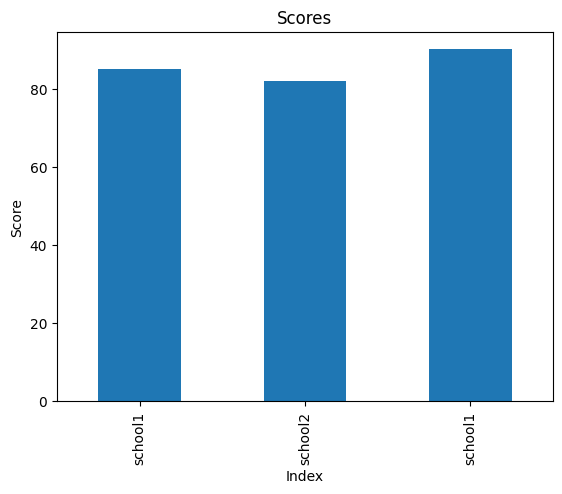

In [21]:
import matplotlib.pyplot as plt

# Plotting a DataFrame
df['Score'].plot(kind='bar')
plt.title('Scores')
plt.xlabel('Index')
plt.ylabel('Score')
plt.show()

**Performance Optimization**

In [24]:
# Using efficient data types
df = pd.read_csv('data.csv', dtype={'Score': 'int32', 'Age': 'float32'}) # If data.csv is in the same directory
# df = pd.read_csv('/path/to/data.csv', dtype={'Score': 'int32', 'Age': 'float32'}) # If data.csv is in a different directory
print(df.info())